## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Import Data

There is one csv file per cohort. We skip 21 rows because those rows in the csv file describe the parameters of the recording (e.g. date, motion threshold) and don't contain actual data. We create one data frame with all of the recall data.

In [2]:
dataCohortOne = pd.read_csv('PSAM_reaaaaaacalls.csv', skiprows=21)
dataCohortTwo = pd.read_csv('PSAM_round2_recalls.csv', skiprows=21)
dataCohortThree = pd.read_csv('Cohort3_Recall.csv', skiprows=21)
dataCohortFour = pd.read_csv('Cohort4RecallDaysFinal.csv', skiprows=21)

data = pd.concat([dataCohortOne, dataCohortTwo, dataCohortThree, dataCohortFour])

## Select the Average Data Across 10 Min

Select the average data by choosing the rows that contain 'avg' in the component name column and we save it into new dataframe. Since not every fear conditioning box contained an animal, don't include the data from the empty box and we also reset the indices.

In [3]:
summarydata = data[data['Component Name'] == 'avg']
summarydata = summarydata[summarydata['Animal'].notnull()].reset_index()

## Split into Two Recall Days

In [4]:
recallDayOneDates = ['210804_PSAM_recall_aged', 
                '210804_PSAM_recall_young',
                '210824_PSAMRecall1_Group1',
                '210824_PSAMRecall1_Group2', 
                '20210914_PSAM_Recall1_group1', 
                '20210914_PSAM_Recall1_group2',
                '2021_11_09_PSAM_Ctx_test_g1', 
                '2021_11_09_PSAM_Ctx_test_g2', 
                '2021_11_09_PSAM_Ctx_test_g3']

recallDayTwoDates = ['210805_PSAM_recall2_aged', 
                '210805_PSAM_recall2_young',
                '210825_ContextTest_Group1',
                '210825_ContextTest_Group2', 
                '20210915_PSAM_Recall2_group1', 
                '20210915_PSAM_Recall2_group2',
                '2021_11_10_CFC_Test2_g1', 
                '2021_11_10_CFC_Test2_g2', 
                '2021_11_10_CFC_Test2_g3']

recalldayone = pd.DataFrame()
recalldaytwo = pd.DataFrame()

for x in recallDayOneDates:
    recalldayone = recalldayone.append(summarydata[summarydata['Experiment'] == x])
    
for x in recallDayTwoDates:
    recalldaytwo = recalldaytwo.append(summarydata[summarydata['Experiment'] == x])

## Split into PSEM and Saline 

One group received saline on Recall Day 1 and PSEM on Recall Day 2. Another group receieved PSEM on Day 1 and saline on Day 2. We split them up here and get the freezing values for each condition.

In [5]:
# Saline on Day 1: 1, 9, 10, 11, 14, 16, 18, 19, 22, 23, 27
# PSEM on Day 2: 1, 9, 10, 11, 14, 16, 18, 19, 22, 23, 27

# PSEM on Day 1: 2, 3, 7, 12, 17, 20, 21, 24, 25, 26
# Saline on Day 2: 2, 3, 7, 12, 17, 20, 21, 24, 25, 26

salineFirst = [9, 10, 11, 14, 16, 'PSAM18', 'PSAM19', 'PSAM22', 'PSAM23', 'PSAM27']
psemFirst = [7, 12, 17, 'PSAM20', 'PSAM21', 'PSAM24', 'PSAM25', 'PSAM26']

salinedayone = pd.DataFrame()
psemdayone = pd.DataFrame()
salinedaytwo = pd.DataFrame()
psemdaytwo = pd.DataFrame()

for x in salineFirst:
    salinedayone = salinedayone.append(recalldayone[recalldayone['Animal']==x])
    psemdaytwo = psemdaytwo.append(recalldaytwo[recalldaytwo['Animal']==x])

for x in psemFirst:
    psemdayone = psemdayone.append(recalldayone[recalldayone['Animal']==x])
    salinedaytwo = salinedaytwo.append(recalldaytwo[recalldaytwo['Animal']==x])

saline = pd.concat([salinedayone, salinedaytwo])
psem = pd.concat([psemdayone, psemdaytwo])

salinefreezing = saline['Pct Total Time Freezing'].values
psemfreezing = psem['Pct Total Time Freezing'].values

## Make Boxplot

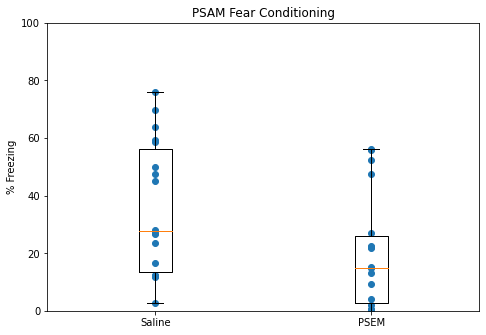

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot([salinefreezing, psemfreezing])
x = [np.ones(18),np.ones(18)*2]
plt.scatter([x],[salinefreezing, psemfreezing])
plt.ylim(0, 100)
plt.xticks([1, 2], ['Saline', 'PSEM'])
plt.title('PSAM Fear Conditioning')
plt.ylabel("% Freezing")
plt.show()

## Boxplot by Recall Day

Do we care about this???

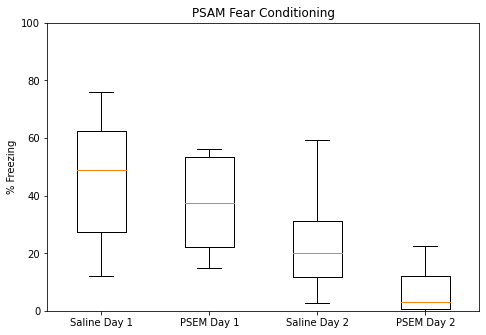

In [8]:
salinefreezingdayone = salinedayone['Pct Total Time Freezing'].values
psemfreezingdayone = psemdayone['Pct Total Time Freezing'].values

salinefreezingdaytwo = salinedaytwo['Pct Total Time Freezing'].values
psemfreezingdaytwo = psemdaytwo['Pct Total Time Freezing'].values

psemfreezingdaytwo
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot([salinefreezingdayone, psemfreezingdayone, salinefreezingdaytwo, psemfreezingdaytwo])
plt.ylim(0, 100)
plt.xticks([1, 2, 3, 4], ['Saline Day 1', 'PSEM Day 1', 'Saline Day 2', 'PSEM Day 2'])
plt.title('PSAM Fear Conditioning')
plt.ylabel("% Freezing")
plt.show()

## Tentative Stats?

In [9]:
#t-test between saline and psem conditions. should i do an ANOVA or something?

print(stats.ttest_ind(salinefreezing, psemfreezing))

Ttest_indResult(statistic=2.127363132112515, pvalue=0.04072498400494308)


In [14]:
stats.ttest_ind(salinefreezingdaytwo, psemfreezingdaytwo)

Ttest_indResult(statistic=2.7230789339386456, pvalue=0.015043211429459366)